In [2]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [38]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import Adam
from tqdm.notebook import tqdm

In [39]:
X=[]
y = []

path='/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes'
for i in tqdm(os.listdir(path)):
    image = os.path.join(path, i)
    img = cv2.imread(image)
    if img is not None:
        img = cv2.resize(img, (224, 224))
        X.append(img)
        y.append(1) 

path='/kaggle/input/brain-mri-images-for-brain-tumor-detection/no'
for i in tqdm(os.listdir(path)):
    image = os.path.join(path, i)
    img = cv2.imread(image)
    if img is not None:
        img = cv2.resize(img, (224, 224))
        X.append(img)
        y.append(0)  
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

  0%|          | 0/155 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

In [40]:
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [44]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(189, 224, 224, 3)
(189, 2)
(64, 224, 224, 3)
(64, 2)


In [45]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)  

model = Model(inputs=base_model.input, outputs=x)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             

 Total params: 26,447,682 (100.89 MB)

 Trainable params: 6,423,298 (24.50 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [46]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

history = model.fit(
    X_train, y_train,
    epochs=40,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/40


I0000 00:00:1733683096.051450      94 service.cc:145] XLA service 0x782674005490 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733683096.051513      94 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733683096.051517      94 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


1/6 ━━━━━━━━━━━━━━━━━━━━ 1:54 23s/step - accuracy: 0.4688 - loss: 1.0742

I0000 00:00:1733683117.426333      94 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


6/6 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.5685 - loss: 1.1395 - val_accuracy: 0.5000 - val_loss: 0.6707 - learning_rate: 1.0000e-04
Epoch 2/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 277ms/step - accuracy: 0.5519 - loss: 0.7750 - val_accuracy: 0.7812 - val_loss: 0.5054 - learning_rate: 1.0000e-04
Epoch 3/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 275ms/step - accuracy: 0.7925 - loss: 0.5189 - val_accuracy: 0.8125 - val_loss: 0.3741 - learning_rate: 1.0000e-04
Epoch 4/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 273ms/step - accuracy: 0.7917 - loss: 0.4378 - val_accuracy: 0.8906 - val_loss: 0.3676 - learning_rate: 1.0000e-04
Epoch 5/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 271ms/step - accuracy: 0.8609 - loss: 0.3501 - val_accuracy: 0.8594 - val_loss: 0.3604 - learning_rate: 1.0000e-04
Epoch 6/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 269ms/step - accuracy: 0.8594 - loss: 0.3371 - val_accuracy: 0.8594 - val_loss: 0.3487 - learning_rate: 1.0000e-04
Epoch 7/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step - accuracy: 0.9008 - loss: 0.2763 - val

In [47]:
loss,test=model.evaluate(X_test,y_test)
print("loss : ",loss)
print("accuracy : ",test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.8542 - loss: 0.3134
loss :  0.3311510682106018
accuracy :  0.84375


<Axes: >

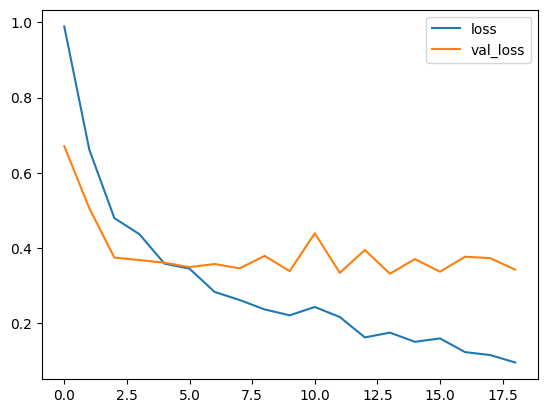

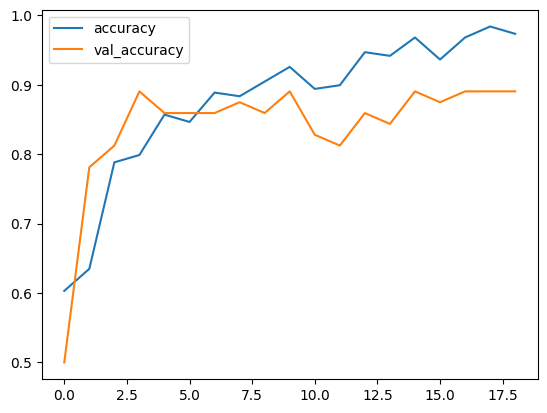

In [48]:
import pandas as pd
ef=pd.DataFrame(history.history)
ef[['loss','val_loss']].plot()
ef[['accuracy','val_accuracy']].plot()

In [49]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step


In [52]:
y_test = np.argmax(y_test, axis=1)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.85      0.89      0.87        37

    accuracy                           0.84        64
   macro avg       0.84      0.83      0.84        64
weighted avg       0.84      0.84      0.84        64



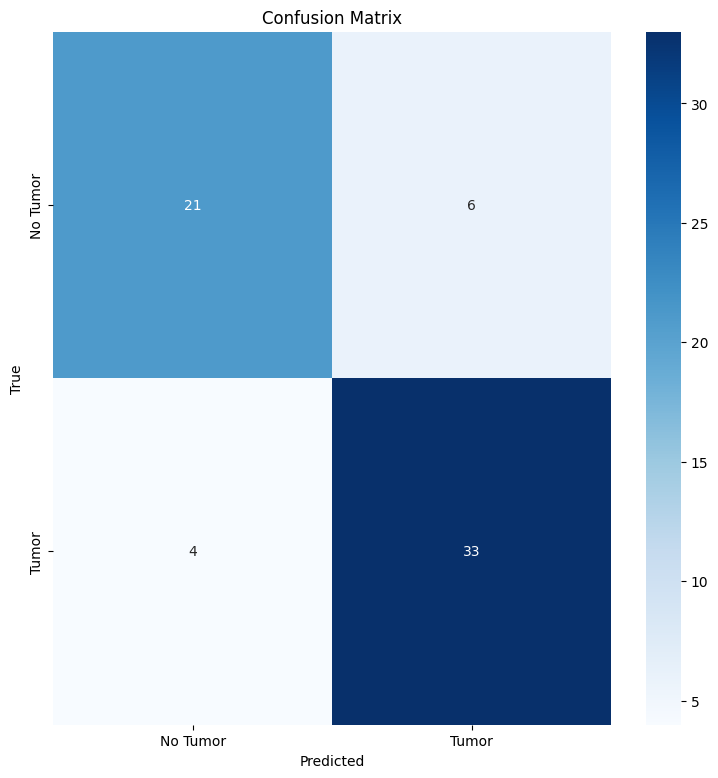

In [54]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Tumor', 'Tumor'], yticklabels=['No Tumor', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [55]:
import matplotlib.pyplot as plt
import numpy as np

num_images = 49
sample_images = X_test[:num_images]
sample_labels = y_test[:num_images]

y_pred_sample = model.predict(sample_images)
y_pred_sample = np.argmax(y_pred_sample, axis=1)  

2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step


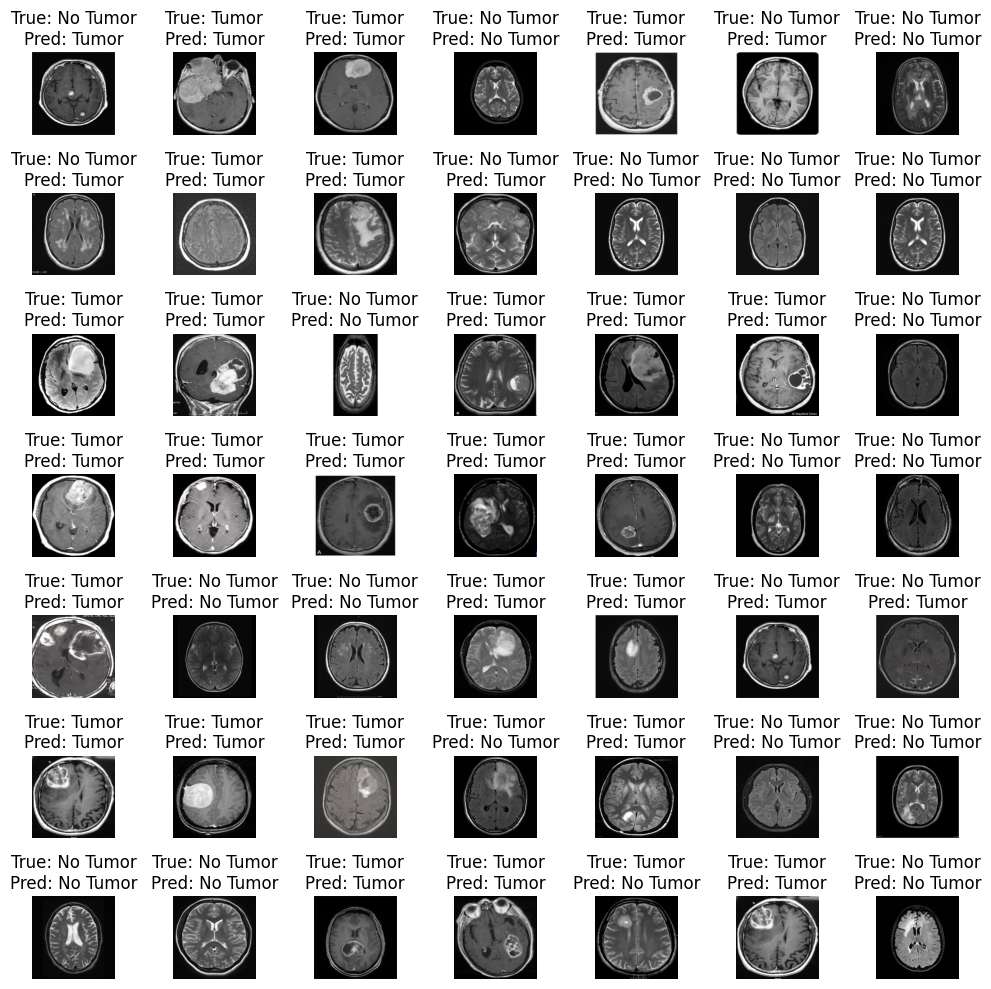

In [56]:
plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(7, 7, i + 1)  
    plt.imshow(sample_images[i])
    true_label = 'Tumor' if sample_labels[i] == 1 else 'No Tumor'
    pred_label = 'Tumor' if y_pred_sample[i] == 1 else 'No Tumor'
    
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')  

plt.tight_layout()  
plt.show()